## Bias Training

In [1]:
import pickle
import lzma

with lzma.open('movie_data_movielens.xz', 'rb') as f:
    train_movie_ratings_list, test_movie_ratings_list = pickle.load(f)

with lzma.open('user_data_movielens.xz', 'rb') as f:
    train_user_ratings_list, test_user_ratings_list = pickle.load(f)

In [6]:
import numpy as np

def arraylize(input_list):
    return [np.array(val) for val in input_list]

train_movie_ratings_list = arraylize(train_movie_ratings_list)
test_movie_ratings_list = arraylize(test_movie_ratings_list)
train_user_ratings_list = arraylize(train_user_ratings_list)
test_user_ratings_list = arraylize(test_user_ratings_list)

In [22]:
from tqdm.notebook import tqdm
import numpy as np

M = len(train_user_ratings_list)
N = len(train_movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

# Hyperparameters
n_epochs = 50
lmb = 1
gamma = 0.05


train_losses = []
train_rmses = []
test_losses = []
test_rmses = []

In [23]:
for i in tqdm(range(n_epochs)):
    for m in range(M):
        if len(train_user_ratings_list[m]) > 0:
            # Extract ratings and indices for the current user
            ratings = train_user_ratings_list[m][:, 1]
            indices = train_user_ratings_list[m][:, 0].astype(int)
            
            # Calculate user bias
            user_bias = lmb * np.sum(ratings - item_biases[indices]) / (lmb * len(indices) + gamma)
            user_biases[m] = user_bias
        

    for n in range(N):
        if len(train_movie_ratings_list[n]) > 0:
            # Extract ratings and indices for the current item
            ratings = train_movie_ratings_list[n][:, 1]
            indices = train_movie_ratings_list[n][:, 0].astype(int)
            
            # Calculate item bias
            item_bias = lmb * np.sum(ratings - user_biases[indices]) / (lmb * len(indices) + gamma)
            item_biases[n] = item_bias
        

    # Calculate loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0
    
    for m in range(M):
        if len(train_user_ratings_list[m]) > 0:
            train_ratings = train_user_ratings_list[m][:, 1]
            train_indices = train_user_ratings_list[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - user_biases[m] - item_biases[train_indices])**2)
            train_size += len(train_indices)
            
        if len(test_user_ratings_list[m]) > 0:
            test_ratings = test_user_ratings_list[m][:, 1]
            test_indices = test_user_ratings_list[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - user_biases[m] - item_biases[test_indices])**2)
            test_size += len(test_indices)
        
    train_loss = -0.5 * lmb * train_error_squared - 0.5 * gamma * np.sum(user_biases**2) - 0.5 * gamma * np.sum(item_biases**2)
    train_rmse = np.sqrt(1 / train_size * train_error_squared)
    
    train_losses.append(-1*train_loss)
    train_rmses.append(train_rmse)

    test_loss = -0.5 * lmb * test_error_squared - 0.5 * gamma * np.sum(user_biases**2) - 0.5 * gamma * np.sum(item_biases**2)
    test_rmse = np.sqrt(1/test_size * test_error_squared)
    
    test_losses.append(-1*test_loss)
    test_rmses.append(test_rmse)
        
    print(f'train loss {round(-1*train_loss, 2)} test loss {round(-1*test_loss, 2)} train rmse {round(train_rmse, 4)} test rmse {round(test_rmse, 4)}')

  0%|          | 0/50 [00:00<?, ?it/s]

train loss 7543474.48 test loss 1974552.51 train rmse 0.8653 test rmse 0.876
train loss 7280340.23 test loss 1907374.5 train rmse 0.85 test rmse 0.8608
train loss 7267737.66 test loss 1904154.92 train rmse 0.8493 test rmse 0.8601
train loss 7266849.69 test loss 1903910.37 train rmse 0.8492 test rmse 0.8601
train loss 7266712.39 test loss 1903846.47 train rmse 0.8492 test rmse 0.8601
train loss 7266651.46 test loss 1903797.65 train rmse 0.8492 test rmse 0.8601
train loss 7266602.71 test loss 1903750.39 train rmse 0.8492 test rmse 0.8601
train loss 7266556.4 test loss 1903703.23 train rmse 0.8492 test rmse 0.8601
train loss 7266510.66 test loss 1903656.06 train rmse 0.8492 test rmse 0.8601
train loss 7266465.08 test loss 1903608.89 train rmse 0.8492 test rmse 0.8601
train loss 7266419.58 test loss 1903561.75 train rmse 0.8492 test rmse 0.8601
train loss 7266374.13 test loss 1903514.66 train rmse 0.8492 test rmse 0.8601
train loss 7266328.74 test loss 1903467.61 train rmse 0.8492 test rms

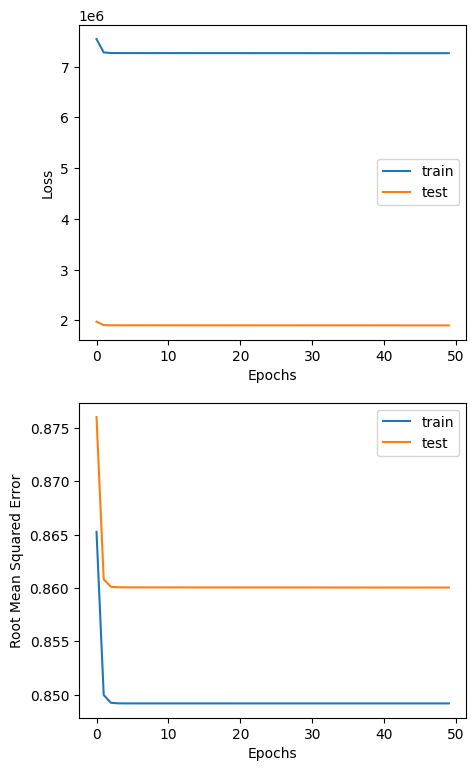

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(5, 9))
ax[0].plot(train_losses, label='train')
ax[0].plot(test_losses, label='test')
# ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(train_rmses, label='train')
ax[1].plot(test_rmses, label='test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Root Mean Squared Error')
# ax[1].set_title('Root Mean Squared Error')
ax[1].legend()
plt.savefig('bias_training.pdf', bbox_inches='tight')

## Full Training - 100k

In [ ]:
M = len(user_ratings_list)
N = len(movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

k = 10

U = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(M, k))
V = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(N, k))

# Hyperparameters
n_epochs = 75
lmb = 1
gamma = 1e-3
tau = 5e-2

losses = []
rmses = []

for i in tqdm(range(n_epochs)):
  for m in range(M):
    bias = 0
    item_counter = 0
    left = 0
    right = 0
    for (n, r) in user_ratings_list[m]:
      bias += lmb * (r - U[m].T.dot(V[n]) - item_biases[n])
      item_counter += 1
    bias = bias / (lmb * item_counter + gamma)
    user_biases[m] = bias

    for (n, r) in user_ratings_list[m]:
      left += V[n]*V[n].reshape(-1, 1)
      right += V[n]*(r - user_biases[m] - item_biases[n])
    U[m] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)


  for n in range(N):
    bias = 0
    user_counter = 0
    left = 0
    right = 0
    for (m, r) in movie_ratings_list[n]:
      bias += lmb * (r - U[m].T.dot(V[n]) - user_biases[m])
      user_counter += 1
    bias = bias / (lmb * user_counter + gamma)
    item_biases[n] = bias

    for (m, r) in movie_ratings_list[n]:
      left += U[m]*U[m].reshape(-1, 1)
      right += U[m]*(r - user_biases[m] - item_biases[n])
    V[n] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)

  error_squared = 0
  size = 0
  for m in range(M):
    for (n, r) in user_ratings_list[m]:
      error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
  loss = -0.5*lmb*error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  rmse = np.sqrt(1/size * error_squared)
  losses.append(loss)
  rmses.append(rmse)

  0%|          | 0/75 [00:00<?, ?it/s]

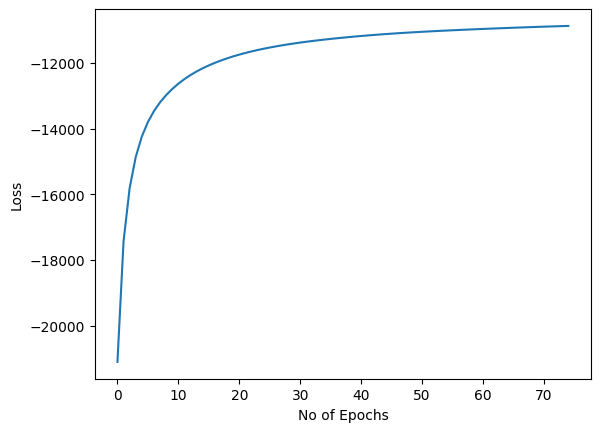

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()

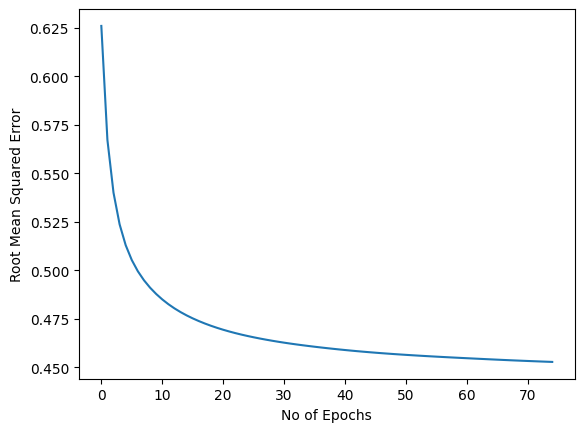

In [ ]:
plt.plot(rmses)
plt.xlabel('No of Epochs')
plt.ylabel('Root Mean Squared Error')
plt.show()

## Full 25M training

In [ ]:
M = len(train_user_ratings_list)
N = len(train_movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

k = 10

U = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(M, k))
V = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(N, k))

# Hyperparameters
n_epochs = 100
lmb = 1
gamma = 1e-3
tau = 5e-2

train_losses = []
train_rmses = []
test_losses = []
test_rmses = []

for i in tqdm(range(n_epochs)):
  for m in range(M):
    bias = 0
    item_counter = 0
    left = 0
    right = 0
    for (n, r) in train_user_ratings_list[m]:
      bias += lmb * (r - U[m].T.dot(V[n]) - item_biases[n])
      item_counter += 1
    bias = bias / (lmb * item_counter + gamma)
    user_biases[m] = bias

    for (n, r) in train_user_ratings_list[m]:
      left += V[n]*V[n].reshape(-1, 1)
      right += V[n]*(r - user_biases[m] - item_biases[n])
    U[m] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)


  for n in range(N):
    bias = 0
    user_counter = 0
    left = 0
    right = 0
    for (m, r) in train_movie_ratings_list[n]:
      bias += lmb * (r - U[m].T.dot(V[n]) - user_biases[m])
      user_counter += 1
    bias = bias / (lmb * user_counter + gamma)
    item_biases[n] = bias

    for (m, r) in train_movie_ratings_list[n]:
      left += U[m]*U[m].reshape(-1, 1)
      right += U[m]*(r - user_biases[m] - item_biases[n])
    V[n] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)

  error_squared = 0
  size = 0
  for m in range(M):
    for (n, r) in train_user_ratings_list[m]:
      train_error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
    for (n, r) in test_user_ratings_list[m]:
      test_error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
  train_loss = -0.5*lmb*train_error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  train_rmse = np.sqrt(1/size * train_error_squared)
  train_losses.append(train_loss)
  train_rmses.append(train_rmse)

  test_loss = -0.5*lmb*test_error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  test_rmse = np.sqrt(1/size * test_error_squared)
  test_losses.append(test_loss)
  test_rmses.append(test_rmse)